# Report

In this project, I worked on predicting car prices by turning the selling price into a 4-class classification problem. I used **Logistic Regression** and added an option to use **Ridge regularization** to improve the model. To evaluate the model's performance, I created functions to calculate precision, recall, F1-score, and accuracy for each class, as well as the macro and weighted averages. I also compared my custom classification report with the one from **Sklearn** to make sure my results were accurate.

I used **MLflow** to track and log the model's performance metrics throughout the experiments. After comparing different models, I selected the best one and used it to make predictions on the test data.

### Model Performance:

- **Accuracy**: 0.55

#### Performance for Each Class (Custom Classification Report):

- **Class 0**:
  - Precision: 0.61
  - Recall: 0.94
  - F1-Score: 0.74
- **Class 1**:
  - Precision: 0.65
  - Recall: 0.09
  - F1-Score: 0.16
- **Class 2**:
  - Precision: 0.44
  - Recall: 0.15
  - F1-Score: 0.22
- **Class 3**:
  - Precision: 0.51
  - Recall: 0.97
  - F1-Score: 0.67

The **macro average** scores for precision, recall, and F1-score were around 0.55, 0.54, and 0.45, while the **weighted averages** were close to these, with precision and recall at 0.55, and the F1-score at 0.46.


## Feature Evaluation

While evaluating features in my dataset, I identified `engine`, `mileage`, and `year` as the most important predictors. These features directly correlate with the vehicle's price. While, features like `brand`, `selling_price`, `km_driven`, `fuel`, `seller_type`, `transmission`, `owner`, `max_power`, and `seats` are not important. The data associated with these features have class imbalance, as I have checked them with graphical distribution. This imbalance skews the prediction modeling, hence these features are less reliable for training and prediction. So I focus on the balanced features.

From the three predictors the `year` has the most weight 

### Key Takeaways:

  ### Best Model:
- **Regularization**: Ridge
- **Method**: Mini-batch Gradient Descent
- **Final Training Loss**: 0.9015

- The model performed best for **Class 0** (F1-score: 0.74) and **Class 3** (F1-score: 0.67), meaning it was able to predict these categories well.
- **Class 1** and **Class 2** were more difficult to predict, with lower recall and F1-scores, possibly due to imbalanced data or fewer clear features separating these classes.
- The overall accuracy was 0.55, and the F1-scores show that the model could be improved, especially for the weaker classes.

By using **Ridge regularization** and my custom classification functions, I was able to monitor how well the model performed and find areas where it could be better.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the flie      
df = pd.read_csv('cars.csv')

In [3]:
#  df.describe()
# checking file columns name
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [4]:
df.rename(columns = {'name':'brand'}, inplace = True)
# df['brand']
df['brand'] = df['brand'].str.split().str[0]
df['brand']

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: brand, Length: 8128, dtype: object

In [5]:
df.drop('torque', axis='columns', inplace=True)

In [6]:
# checking unique data in column
unique_labels = df['owner'].unique()
unique_labels

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [7]:
df = df[df['owner'] != 'Test Drive Car']

# unique_labels = df['owner'].unique()
# unique_labels

In [8]:
custom_encoding = {'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3}

df['owner'] = df['owner'].map(custom_encoding)
df['owner'].unique()

array([0, 1, 2, 3])

In [9]:
# unique_labels = df['brand'].unique()
# unique_labels

In [10]:
# custom_encoding = {'Maruti':0, 'Skoda':1, 'Honda':2, 'Hyundai':3, 'Toyota':4, 'Ford':5, 'Renault':6,
#        'Mahindra':7, 'Tata':8, 'Chevrolet':9, 'Fiat':10, 'Datsun':11, 'Jeep':12,
#        'Mercedes-Benz':13, 'Mitsubishi':14, 'Audi':15, 'Volkswagen':16, 'BMW':17,
#        'Nissan':18, 'Lexus':19, 'Jaguar':20, 'Land':21, 'MG':22, 'Volvo':23, 'Daewoo':24,
#        'Kia':25, 'Force':26, 'Ambassador':27, 'Ashok':28, 'Isuzu':29, 'Opel':30, 'Peugeot':31}

# df['brand'] = df['brand'].map(custom_encoding)
# df['brand'].unique()

In [11]:
df = pd.DataFrame(df)

# Display the shape before dropping rows
print("Before dropping rows:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

df.drop(df[df['fuel'].isin(['CNG', 'LPG'])].index, inplace=True)

# Display the shape after dropping rows
print("\nAfter dropping rows:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Before dropping rows:
Number of rows: 8123
Number of columns: 12

After dropping rows:
Number of rows: 8028
Number of columns: 12


In [12]:
df['mileage'] = df['mileage'].str.replace('kmpl', '', regex=False).astype(float)
df['mileage'].dtype

df['engine'] = df['engine'].str.replace('CC', '', regex=False).astype(float)
df['engine'].dtype

df['max_power'] = df['max_power'].str.replace('bhp', '', regex=False).astype(float)
df['max_power'].dtype

dtype('float64')

In [13]:
unique_labels = df['fuel'].unique()
unique_labels

array(['Diesel', 'Petrol'], dtype=object)

In [14]:
# custom_encoding = {'Diesel':0, 'Petrol':1}

# df['fuel'] = df['fuel'].map(custom_encoding)
# df['fuel'].unique()

In [15]:
# unique_labels = df['seller_type'].unique()
# unique_labels

In [16]:
# custom_encoding = {'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}

# df['seller_type'] = df['seller_type'].map(custom_encoding)
# df['seller_type'].unique()

In [17]:
# unique_labels = df['transmission'].unique()
# unique_labels

In [18]:
# custom_encoding = {'Manual':0, 'Automatic':1}

# df['transmission'] = df['transmission'].map(custom_encoding)
# df['transmission'].unique()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


In [20]:
df = df.drop_duplicates().reset_index(drop=True)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6808 entries, 0 to 6807
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          6808 non-null   object 
 1   year           6808 non-null   int64  
 2   selling_price  6808 non-null   int64  
 3   km_driven      6808 non-null   int64  
 4   fuel           6808 non-null   object 
 5   seller_type    6808 non-null   object 
 6   transmission   6808 non-null   object 
 7   owner          6808 non-null   int64  
 8   mileage        6607 non-null   float64
 9   engine         6607 non-null   float64
 10  max_power      6610 non-null   float64
 11  seats          6607 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 638.4+ KB


In [22]:
# columns_to_check = ['brand', 'year', 'km_driven', 'fuel', 'seller_type',
#                      'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']

# df = df.dropna(subset=columns_to_check)
# print(df)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6808 entries, 0 to 6807
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          6808 non-null   object 
 1   year           6808 non-null   int64  
 2   selling_price  6808 non-null   int64  
 3   km_driven      6808 non-null   int64  
 4   fuel           6808 non-null   object 
 5   seller_type    6808 non-null   object 
 6   transmission   6808 non-null   object 
 7   owner          6808 non-null   int64  
 8   mileage        6607 non-null   float64
 9   engine         6607 non-null   float64
 10  max_power      6610 non-null   float64
 11  seats          6607 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 638.4+ KB


In [24]:
df['selling_price'] = np.log(df['selling_price'])
# df['km_driven'] = np.log(df['km_driven'])
# (df['selling_price'])

In [25]:
# plt.figure(figsize=(25, 10))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [26]:
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,1,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,2,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6803,Maruti,2013,12.468437,50000,Petrol,Individual,Manual,1,18.90,998.0,67.10,5.0
6804,Hyundai,2014,13.071070,80000,Diesel,Individual,Manual,1,22.54,1396.0,88.73,5.0
6805,Hyundai,2013,12.676076,110000,Petrol,Individual,Manual,0,18.50,1197.0,82.85,5.0
6806,Hyundai,2007,11.813030,119000,Diesel,Individual,Manual,3,16.80,1493.0,110.00,5.0


<Axes: xlabel='seller_type', ylabel='count'>

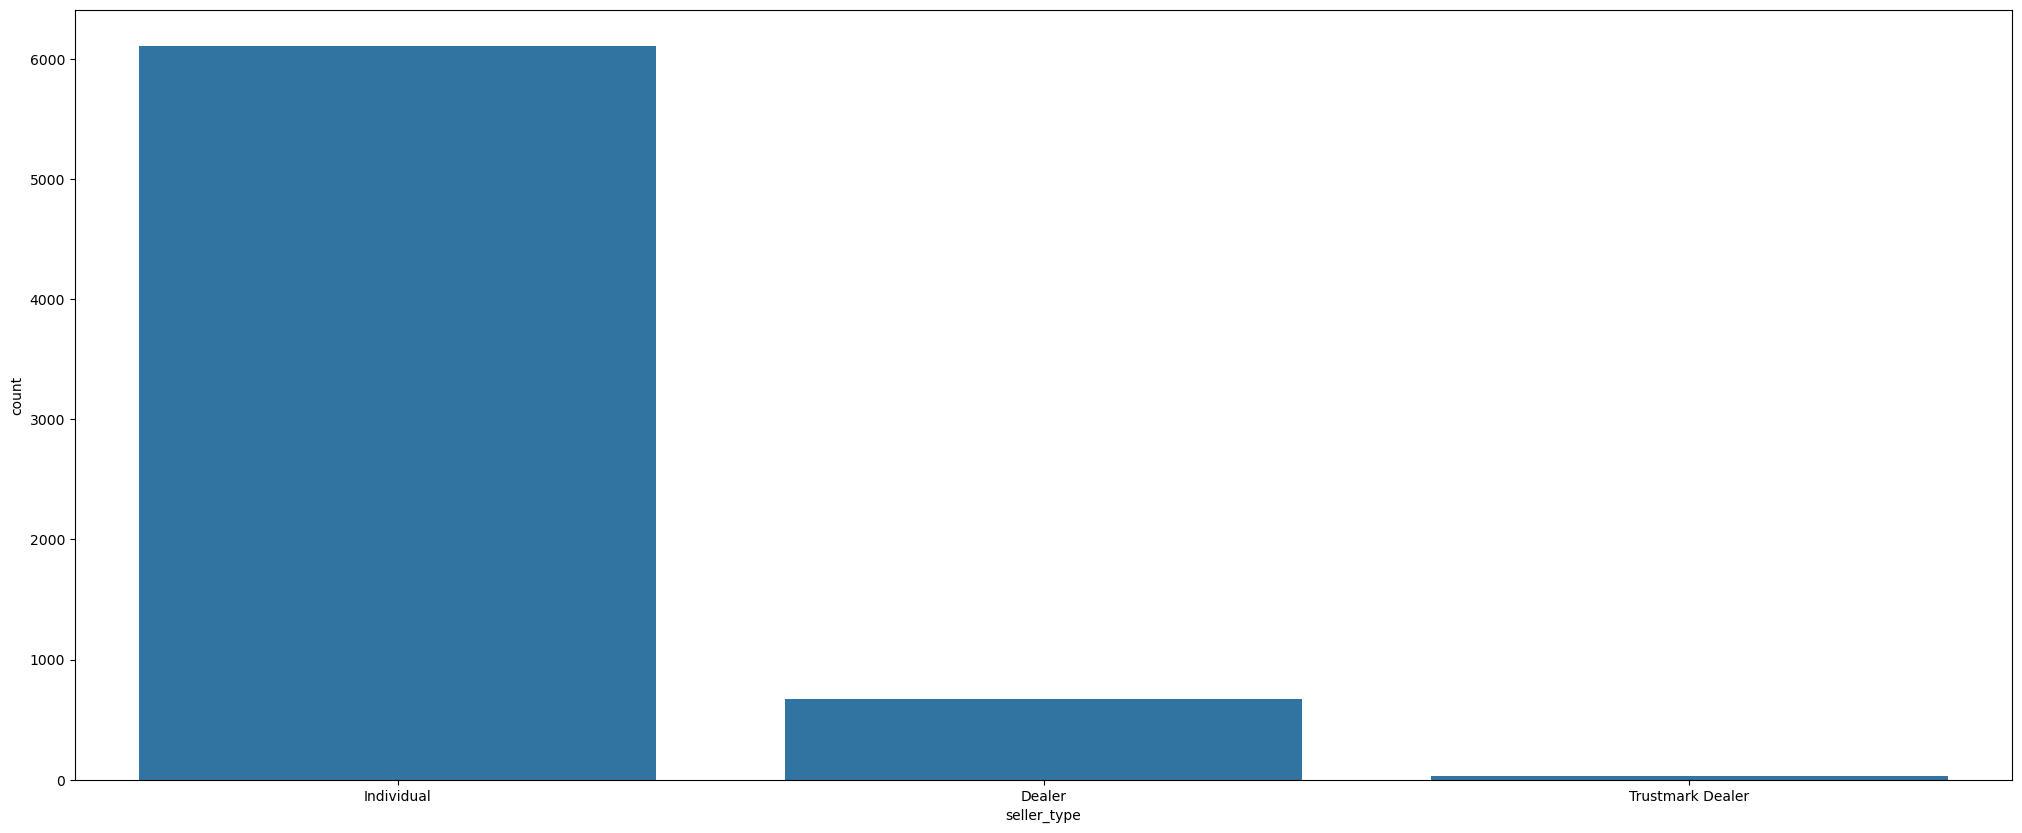

In [27]:
plt.figure(figsize=(25, 10))
sns.countplot( df, x = 'seller_type')


<Axes: xlabel='transmission', ylabel='count'>

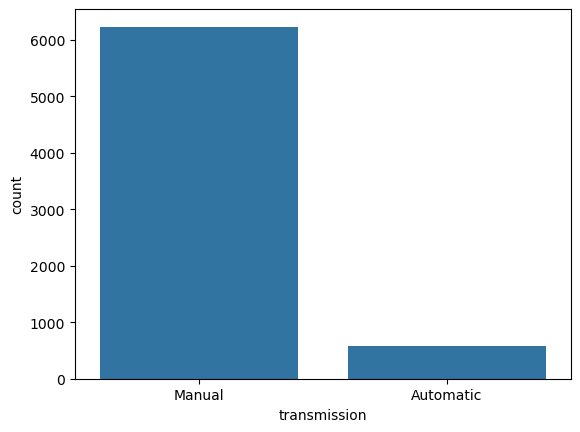

In [28]:
sns.countplot( df, x = 'transmission')


<Axes: xlabel='owner', ylabel='count'>

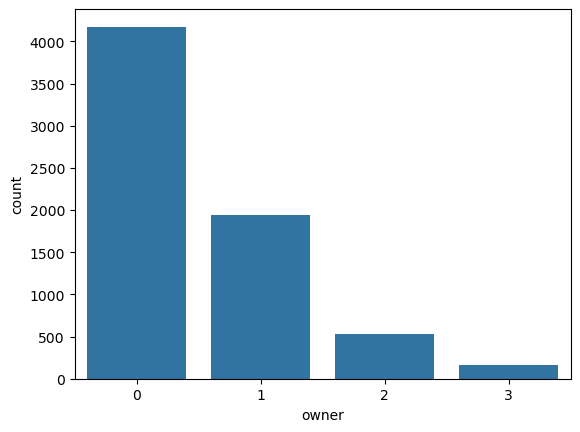

In [29]:
sns.countplot( df, x = 'owner')


<Axes: xlabel='seats', ylabel='count'>

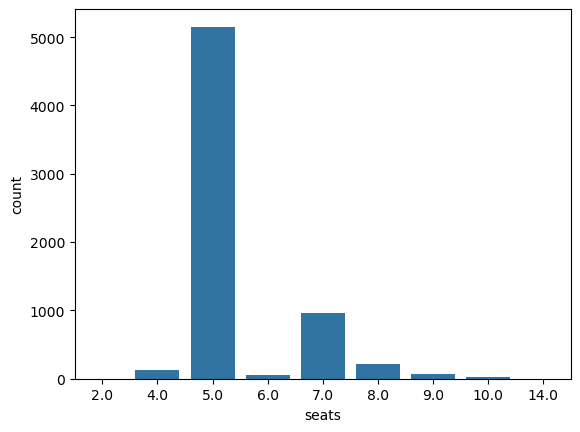

In [30]:
sns.countplot( df, x = 'seats')

<Axes: xlabel='owner', ylabel='selling_price'>

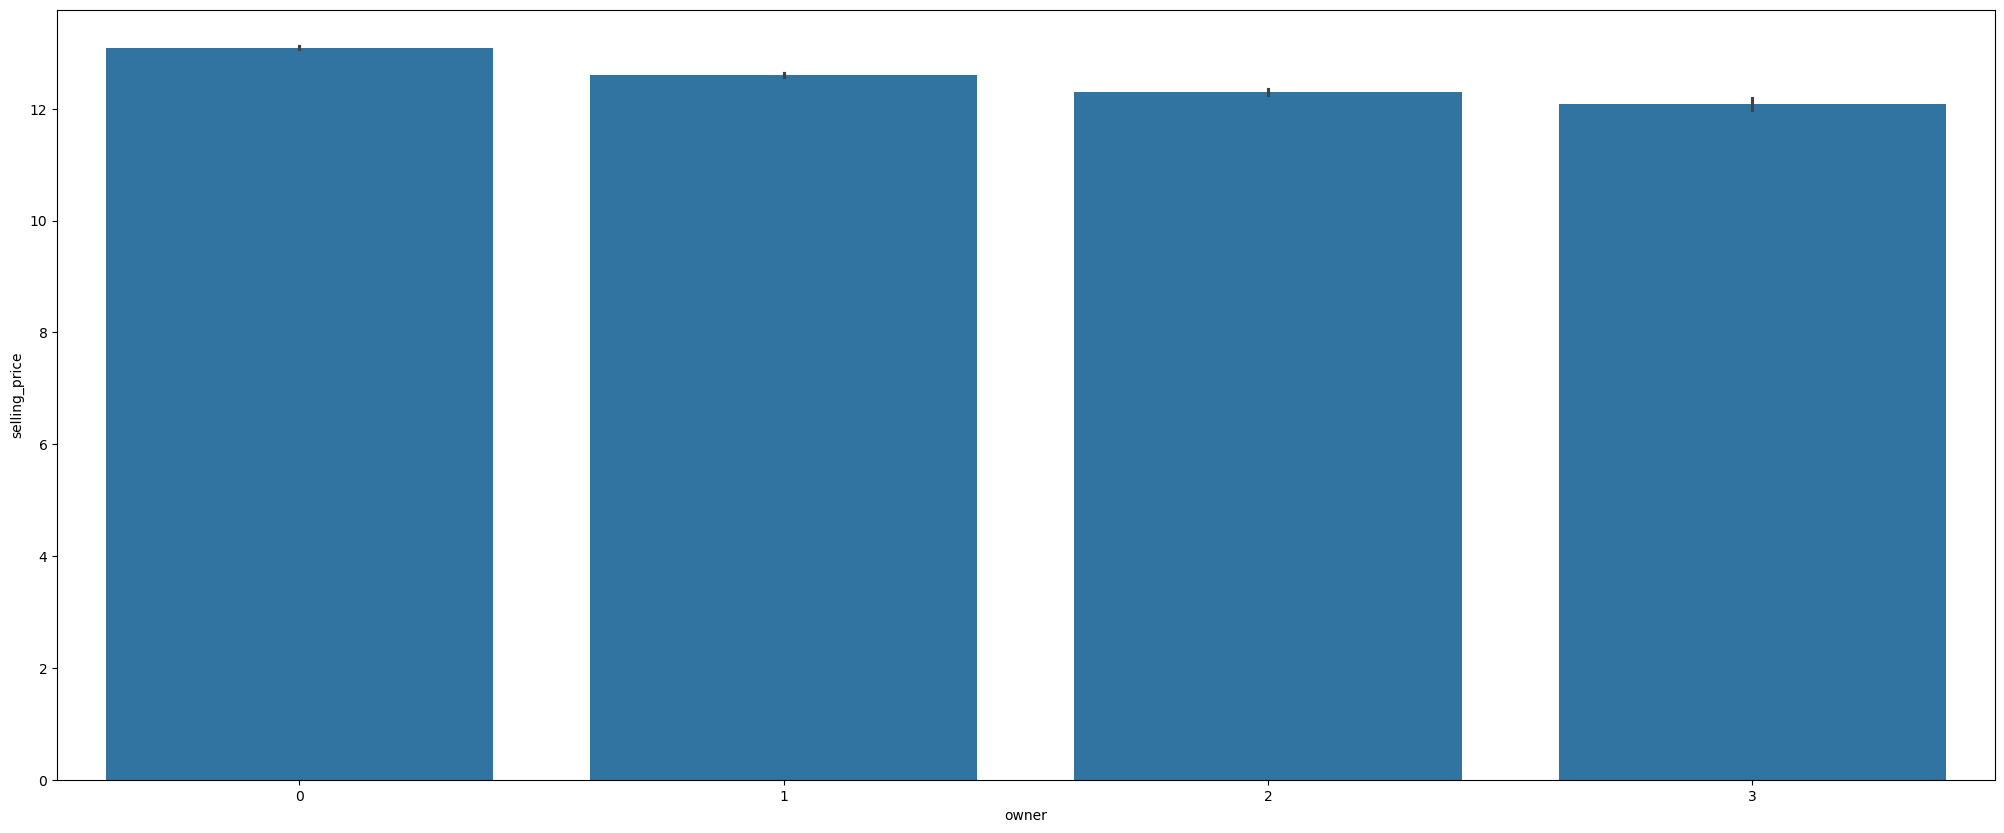

In [31]:
plt.figure(figsize=(25, 10))

sns.barplot(df, x='owner', y='selling_price')


<Figure size 2500x1000 with 0 Axes>

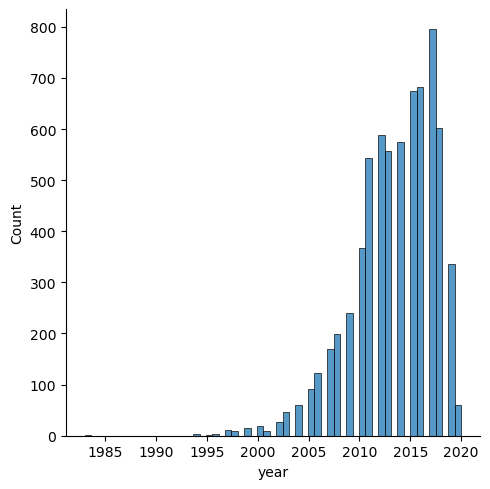

In [32]:
plt.figure(figsize=(25, 10))

sns.displot( df, x = 'year') 

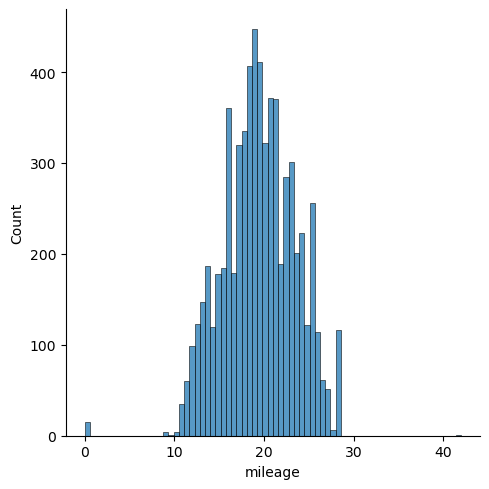

In [33]:

sns.displot( df, x = 'mileage') 

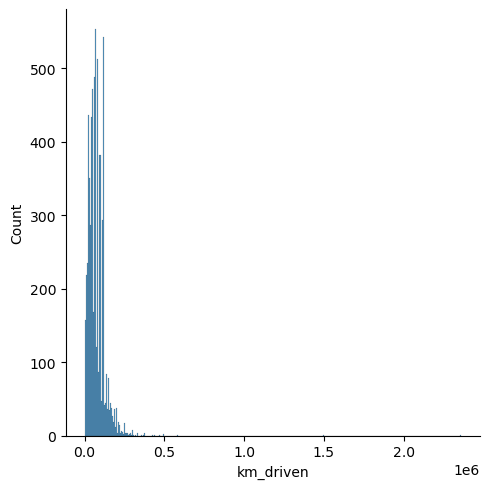

In [34]:

sns.displot( df, x = 'km_driven')

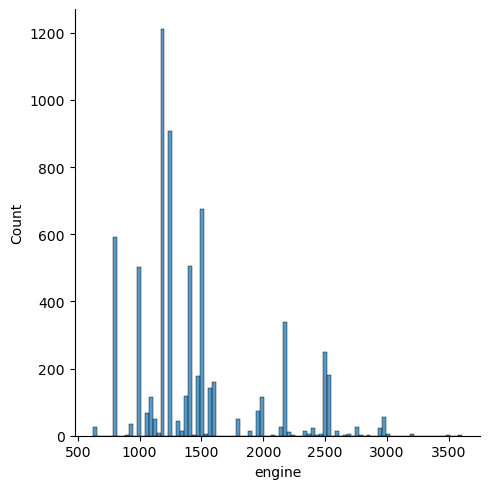

In [35]:

sns.displot( df, x = 'engine') 


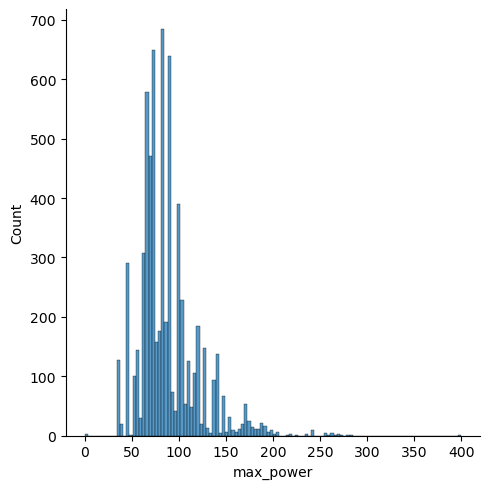

In [36]:
sns.displot( df, x = 'max_power')

<Axes: xlabel='owner', ylabel='selling_price'>

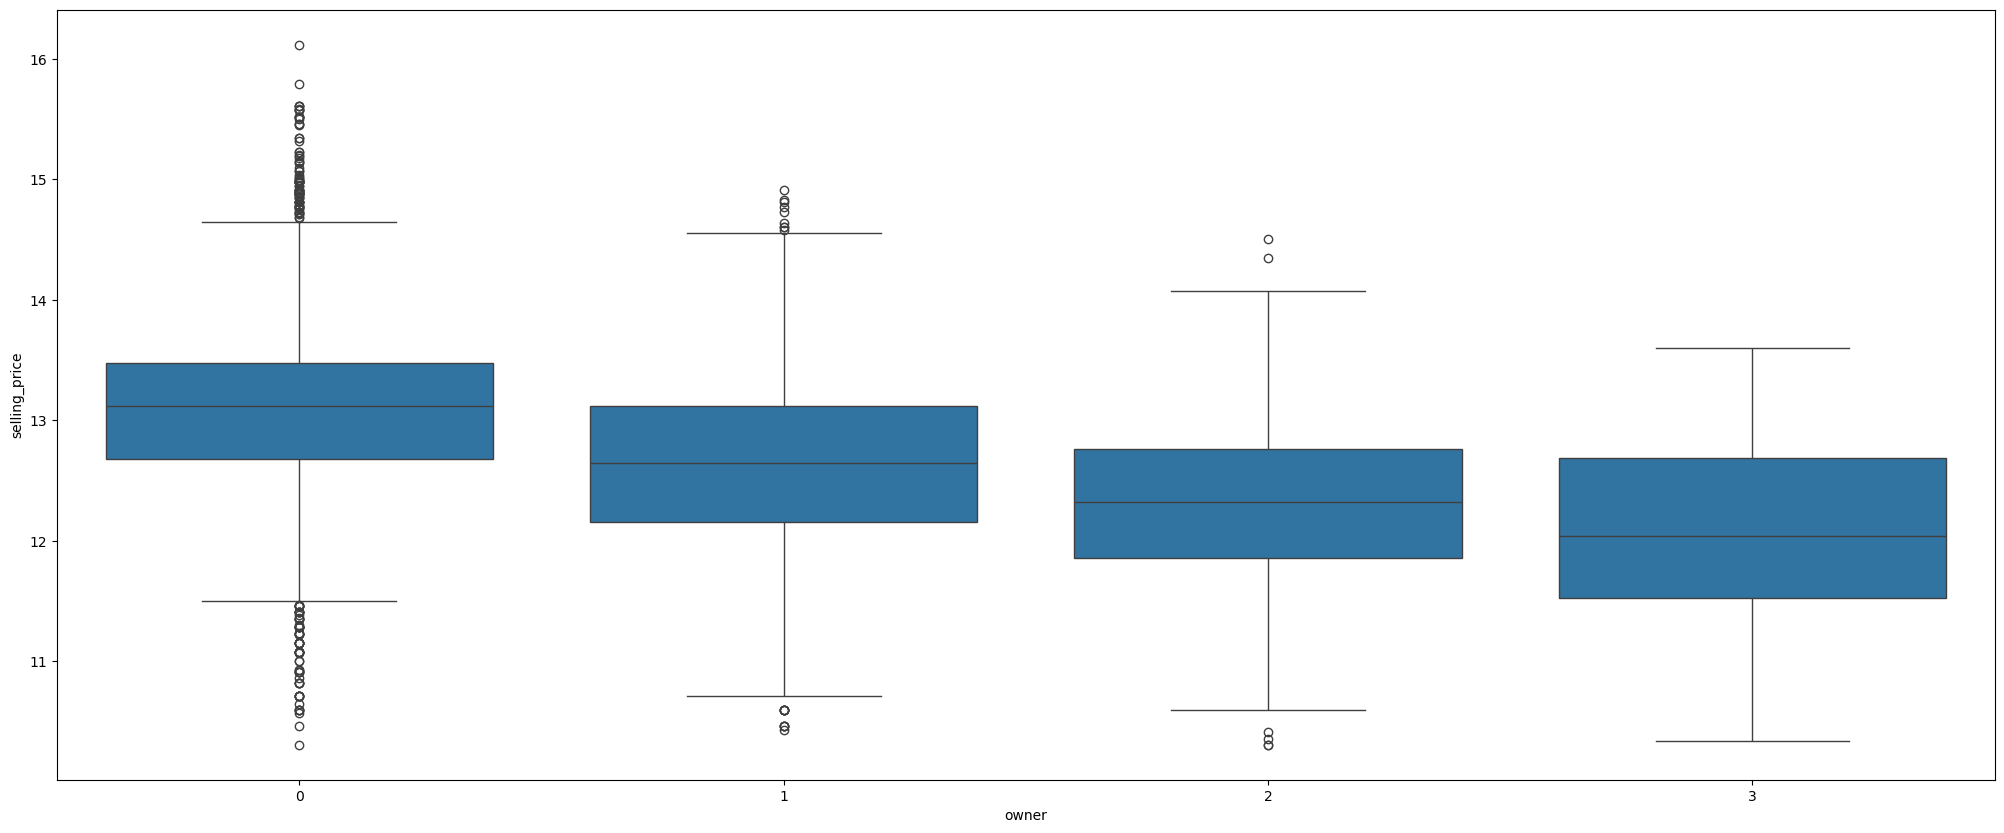

In [37]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=df, x='owner', y='selling_price')

<Axes: xlabel='engine', ylabel='selling_price'>

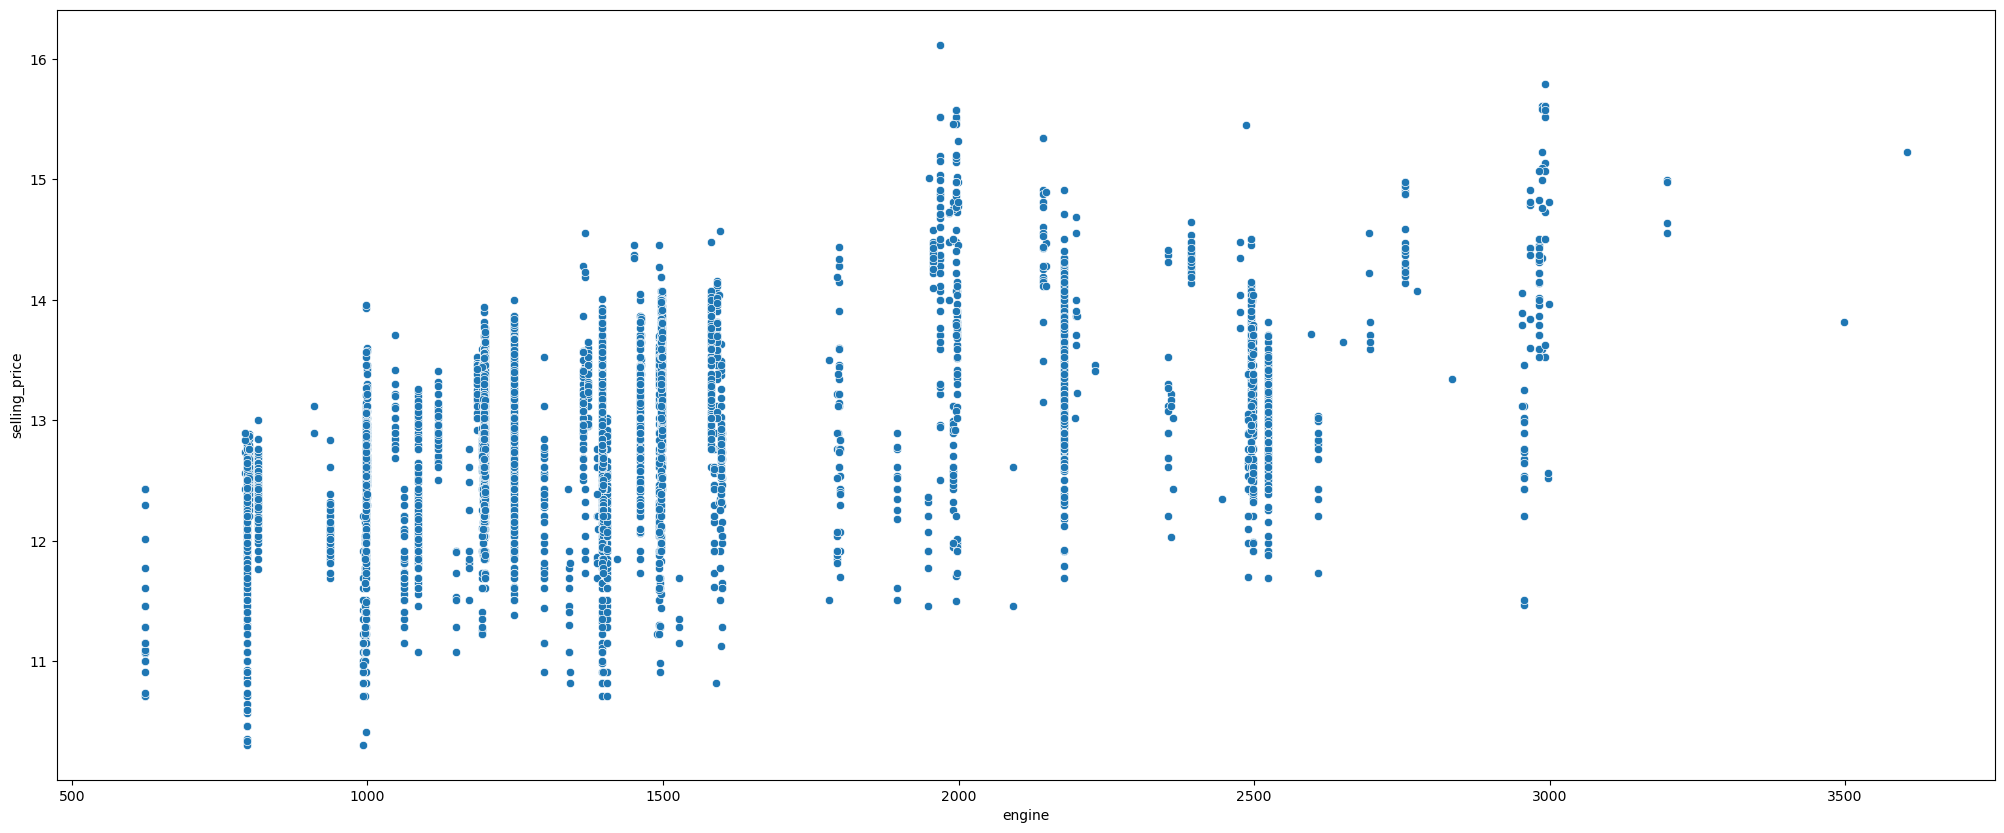

In [38]:
plt.figure(figsize=(25, 10))
sns.scatterplot(x = df['engine'], y=df['selling_price'])


<Axes: xlabel='max_power', ylabel='selling_price'>

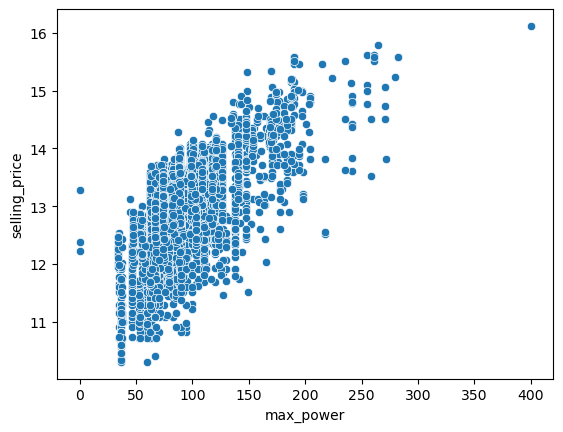

In [39]:
sns.scatterplot(x = df['max_power'], y=df['selling_price'])


<Axes: xlabel='max_power', ylabel='engine'>

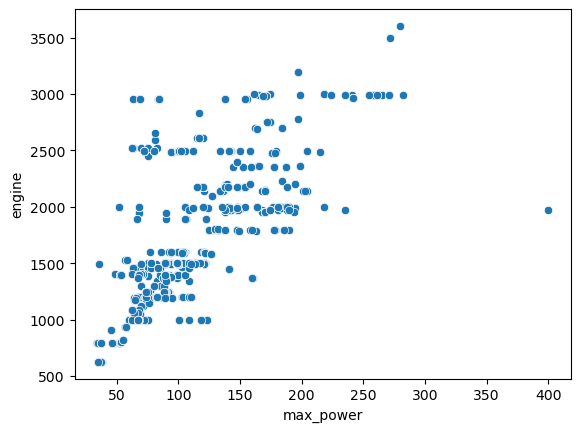

In [40]:
sns.scatterplot(x = df['max_power'], y=df['engine'])

<Axes: xlabel='selling_price', ylabel='year'>

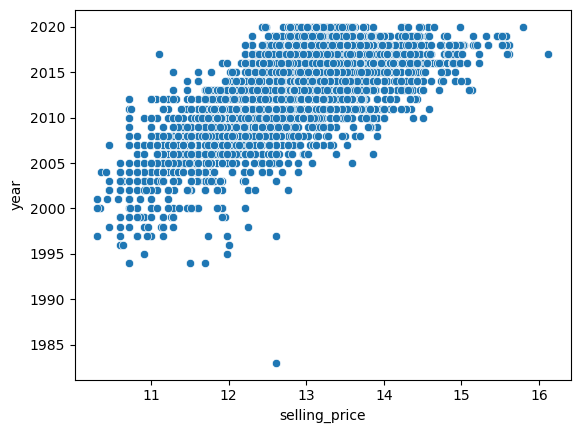

In [41]:
sns.scatterplot(x = df['selling_price'], y=df['year'])

<Axes: >

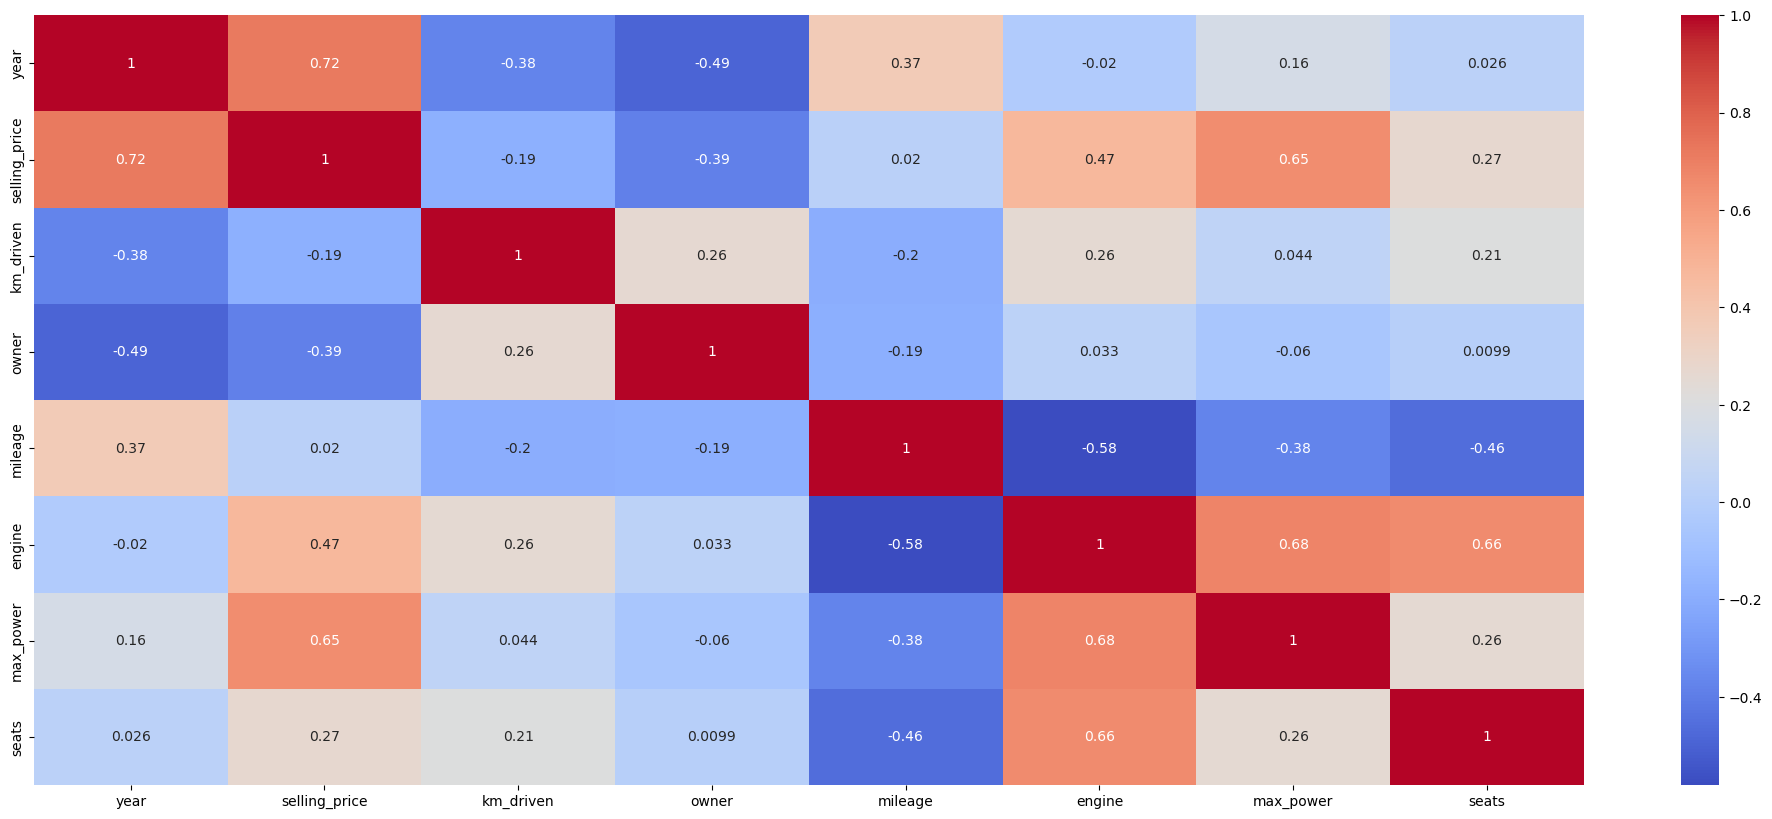

In [42]:
plt.figure(figsize=(25, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='x', ylabel='y'>

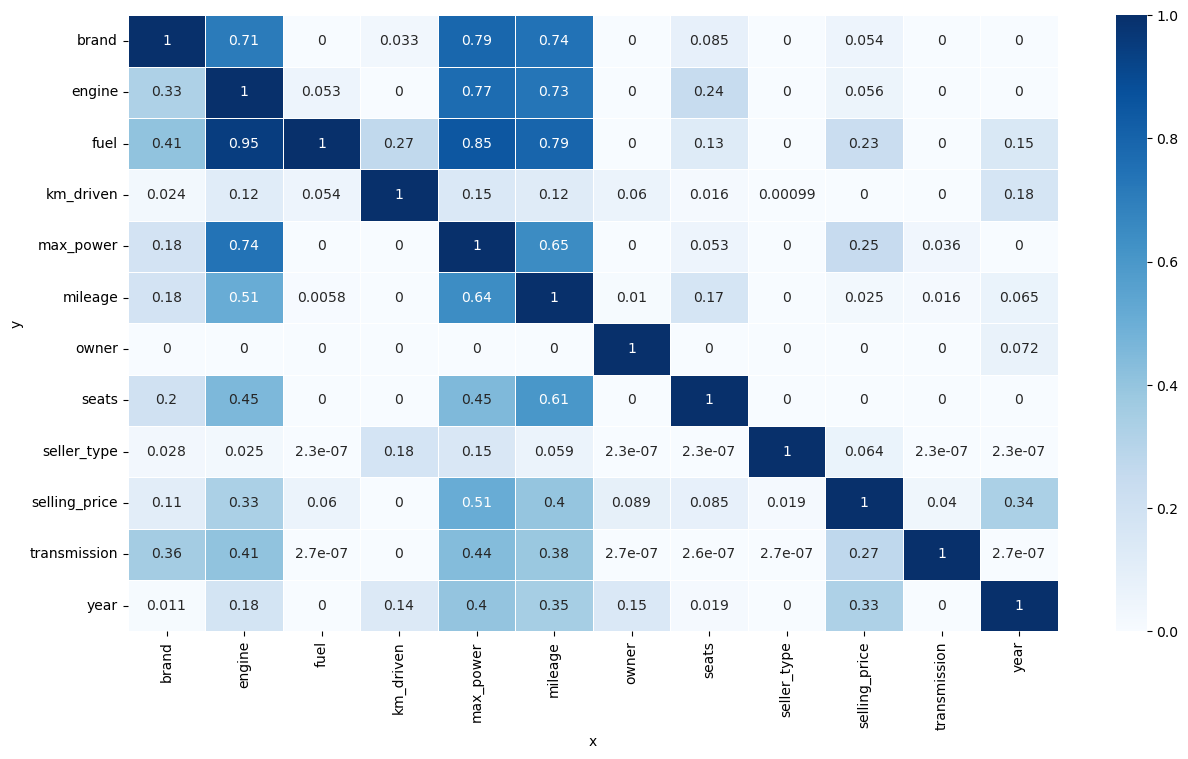

In [43]:
import ppscore as pps

matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize=(15, 8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [44]:
df['selling_price'] = pd.qcut(x=df['selling_price'], q=4, labels=range(0, 4))
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,2,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,5.0
1,Skoda,2014,1,120000,Diesel,Individual,Manual,1,21.14,1498.0,103.52,5.0
2,Honda,2006,0,140000,Petrol,Individual,Manual,2,17.70,1497.0,78.00,5.0
3,Hyundai,2010,0,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,5.0
4,Maruti,2007,0,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,5.0


In [45]:
X = df[ ['engine', 'mileage' , 'year']  ]

y = df["selling_price"]  

X.shape, y.shape

((6808, 3), (6808,))

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [47]:
X_train.shape, X_test.shape


((4765, 3), (2043, 3))

In [48]:
y_train.shape, y_test.shape

((4765,), (2043,))

In [49]:
# checking which column has null values
null_check = df.isna().sum()
null_check

brand              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          201
engine           201
max_power        198
seats            201
dtype: int64

In [50]:
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [51]:
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_test['engine'].fillna(X_train['engine'].mean(), inplace=True)

In [52]:
null_check = X_train.isna().any()
null_check

engine     False
mileage    False
year       False
dtype: bool

In [53]:
y_train.isna().sum()

0

In [54]:
y_test.isna().sum()

0

In [55]:
X_train.shape,y_train.shape
# X_test.shape,y_test.shape

((4765, 3), (4765,))

In [56]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import StandardScaler

num_cols = ['year', 'mileage', 'engine']
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# scalar  =   StandardScaler()
# X_train =   scalar.fit_transform(X_train)
# X_test  =   scalar.transform(X_test)

# intercept   = np.ones((X_train.shape[0], 1))
# X_train     = np.concatenate((intercept, X_train), axis=1)
# intercept   = np.ones((X_test.shape[0], 1))
# X_test      = np.concatenate((intercept, X_test), axis=1)

In [57]:
Y_train_encoded = pd.get_dummies(y_train)
k = len(set(y))
X_train = X_train.to_numpy()
X_test  = X_test.to_numpy()
Y_train_encoded = Y_train_encoded.to_numpy()
y_test  = y_test.to_numpy()

In [58]:
from sklearn.model_selection import KFold
import mlflow
import time
import os

mlflow.set_tracking_uri('http://mlflow.ml.brain.cs.ait.ac.th/')

# mlflow.set_tracking_uri('http://127.0.0.1:5000')

os.environ["LOGNAME"] = "st125051"
os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"

mlflow.set_experiment(experiment_name="st125051_usmankhalid_assignment")

<Experiment: artifact_location='mlflow-artifacts:/423951578024318296', creation_time=1725643423571, experiment_id='423951578024318296', last_update_time=1725643423571, lifecycle_stage='active', name='st125051_usmankhalid_assignment', tags={}>

In [59]:
class LogisticRegression:

    def __init__(self, regularization, k, n, method, alpha=0.001, max_iter=5000):
        self.regularization = regularization
        self.k = int(k)
        self.n = int(n)
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.W = None  # Will be initialized later
        self.losses = []

    def fit(self, X, Y):
       
        self.W = np.random.rand(self.n, self.k)
        params = {
            "reg": type(self).__name__,
            "method": self.method,
            "k": int(self.k),
            "n": int(self.n),
            "alpha": self.alpha,
            "max_iter": self.max_iter
        }
        mlflow.log_params(params=params)

        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad = self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    if isinstance(loss, pd.Series):
                        loss = loss.mean()
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")

        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0])  # With replacement
                batch_X = X[ix:ix + batch_size]
                batch_Y = Y[ix:ix + batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    if isinstance(loss, pd.Series):
                        loss = loss.mean()
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")

        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad

                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    if isinstance(loss, pd.Series):
                        loss = loss.mean()
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")

        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')

    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = -np.sum(Y * np.log(h)) / m
        error = h - Y

        if self.regularization:
            grad = self.softmax_grad(X, error) + self.regularization.derivation(self.W)
        else:
            grad = self.softmax_grad(X, error)

        return loss, grad

    def softmax(self, X):
        if isinstance(X, (pd.DataFrame, pd.Series)):
            X = X.values
        exp_vals = np.exp(X - np.max(X, axis=1, keepdims=True))
        return exp_vals / np.sum(exp_vals, axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return X.T @ error

    def h_theta(self, X, W):
        return self.softmax(X @ W)

    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)

    def plot(self):
        plt.plot(np.arange(len(self.losses)), self.losses, label="Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    def accuracy(self, y_test, y_pred):
        correct_predictions = np.sum(y_test == y_pred)
        total_predictions = y_test.shape[0]
        return correct_predictions / total_predictions

    def precision(self, y_test, y_pred, c=0):
        true_positives = np.sum((y_test == c) & (y_pred == c))
        false_positives = np.sum((y_test != c) & (y_pred == c))
        if true_positives + false_positives == 0:
            return 0
        else:
            return true_positives / (true_positives + false_positives)

    def recall(self, y_test, y_pred, c=0):
        true_positives = np.sum((y_test == c) & (y_pred == c))
        false_negatives = np.sum((y_test == c) & (y_pred != c))
        if true_positives + false_negatives == 0:
            return 0
        else:
            return true_positives / (true_positives + false_negatives)

    def f1_score(self, y_test, y_pred, c=0):
        precision = self.precision(y_test, y_pred, c)
        recall = self.recall(y_test, y_pred, c)
        if precision + recall == 0:
            return 0
        else:
            return 2 * precision * recall / (precision + recall)

    def macro_precision(self, y_test, y_pred):
        precisions = [self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions) / self.k

    def macro_recall(self, y_test, y_pred):
        recalls = [self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls) / self.k

    def macro_f1(self, y_test, y_pred):
        f1s = [self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s) / self.k

    def weighted_precision(self, y_test, y_pred):
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        precisions = [class_counts[c] / len(y_test) * self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions)

    def weighted_recall(self, y_test, y_pred):
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        recalls = [class_counts[c] / len(y_test) * self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls)

    def weighted_f1(self, y_test, y_pred):
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        f1s = [class_counts[c] / len(y_test) * self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s)

    def classification_report(self, y_test, y_pred):
        cols = ["precision", "recall", "f1-score"]
        idx = list(range(self.k)) + ["accuracy", "macro", "weighted"]

        report = [[self.precision(y_test, y_pred, c),
                   self.recall(y_test, y_pred, c),
                   self.f1_score(y_test, y_pred, c)] for c in range(self.k)]

        report.append(["", "", self.accuracy(y_test, y_pred)])

        report.append([self.macro_precision(y_test, y_pred),
                       self.macro_recall(y_test, y_pred),
                       self.macro_f1(y_test, y_pred)])

        report.append([self.weighted_precision(y_test, y_pred),
                       self.weighted_recall(y_test, y_pred),
                       self.weighted_f1(y_test, y_pred)])

        return pd.DataFrame(report, index=idx, columns=cols)

Now we can create `Ridge`, `Lasso` and `Elastic` class that extends the `LinearRegression`, with added penalty.

In [60]:
class RidgePenalty():
    def __init__(self, l):
        self.l = l

    def __call__(self, theta):
        return self.l * np.sum(np.square(theta))

    def derivation(self, theta):
       return self.l * 2 * theta

class Ridge(LogisticRegression):
    def __init__(self, l, k, n, method, alpha=0.001, max_iter=5000):
        regularization = RidgePenalty(l)
        super().__init__(regularization, k, n, method, alpha, max_iter)

class Normal(LogisticRegression):
    def __init__(self, k, n, method, alpha=0.001, max_iter=5000):
        super().__init__(regularization=None, k=k, n=n, method=method, alpha=alpha, max_iter=max_iter)

## Experiment

In [61]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [62]:
# regs = ["Ridge", "Lasso", "ElasticNet", "Normal"]

# for reg in regs:
#     params = {"method": "batch", "l": 0.1, "lr": 0.1,  "polynomial": True, "init" :"xavier", "use_momentum" :True,  "momentum":0.5, "degree":3}
#     mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}", nested=True)
    
#     print("="*5, reg, "="*5)

#     #######
#     type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
#     model = type_of_regression(**params)
#     model.fit(X_train, y_train)
    
#     mse = model.avgMSE()
#     r2 = model.avgr2()
#     yhat = model.predict(X_train)    
    
#     print("Test MSE: ", mse)
#     print("Test R2: ", r2)

#     mlflow.log_metric(key="test_mse", value=mse)
#     mlflow.log_metric(key="test_r2", value=r2)

#     signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
#     mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

#     # #######
    
#     mlflow.end_run()

In [63]:
regs = ["Normal", "Ridge"]
methods = ["batch", "minibatch", "sto"]
alphas = [0.01, 0.001, 0.0001]
best_model = None
best_train_loss = float('inf')
best_reg_name = ""
best_method = ""

for reg in regs:
    for method in methods:
        mlflow.start_run(run_name=f"reg-{reg}-method-{method}", nested=True)

        for alpha in alphas:
            if reg == "Normal":
                params = {"k": k, "n":X_train.shape[1], "method": method, "alpha": alpha, "max_iter": 10000}
            else:
                params = {"k": k, "n":X_train.shape[1], "method": method, "l": 0.1, "alpha": alpha, "max_iter": 10000}
            
            with mlflow.start_run(run_name=f"reg-{reg}-method-{params['method']}-alpha-{params['alpha']}", nested=True):
                print("="*30)
                print(reg, method)
                print(f"alpha: {alpha}")
                print("="*30)
                type_of_regression = str_to_class(reg)
                model = type_of_regression(**params)  
                model.fit(X_train, Y_train_encoded)
                yhat = model.predict(X_test)

                accuracy = model.accuracy(y_test, yhat)
                mlflow.log_metric(key="accuracy", value=accuracy)

                for c in range(k):
                    f1 = model.f1_score(y_test, yhat, c)
                    precision = model.precision(y_test, yhat, c)
                    recall = model.recall(y_test, yhat, c)
                    mlflow.log_metric(key=f"class_{c}_f1", value=f1)
                    mlflow.log_metric(key=f"class_{c}_recall", value=recall)
                    mlflow.log_metric(key=f"class_{c}_precision", value=precision)
                
                # Get the final training loss
                final_train_loss = model.losses[-1]
                print(f"Final Training Loss: {final_train_loss}")
                
                # Compare the current model's training loss with the best so far
                if final_train_loss < best_train_loss:
                    best_train_loss = final_train_loss
                    best_model = model
                    best_reg_name = reg
                    best_method = method

                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)                

        mlflow.end_run()

mlflow.end_run()

Normal batch
alpha: 0.01
Loss at iteration 0 1.29997801798004
Loss at iteration 500 5.105138370438126
Loss at iteration 1000 5.105138370438127
Loss at iteration 1500 5.105138370438127
Loss at iteration 2000 5.105138370438127
Loss at iteration 2500 5.105138370438127
Loss at iteration 3000 5.1051383704381275
Loss at iteration 3500 5.105138370438127
Loss at iteration 4000 5.1051383704381275
Loss at iteration 4500 5.105138370438127
Loss at iteration 5000 5.105138370438126
Loss at iteration 5500 5.1051383704381275
Loss at iteration 6000 5.1051383704381275
Loss at iteration 6500 5.105138370438127
Loss at iteration 7000 5.1051383704381275
Loss at iteration 7500 5.105138370438126
Loss at iteration 8000 5.105138370438127
Loss at iteration 8500 5.105138370438126
Loss at iteration 9000 5.105138370438126
Loss at iteration 9500 5.105138370438127
time taken: 7.4009950160980225
Final Training Loss: 9.970556655060488


2024/10/17 00:44:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-batch-alpha-0.01 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/a4472c5d69434227a9fec8dea9f86be0.
2024/10/17 00:44:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.


Normal batch
alpha: 0.001
Loss at iteration 0 1.3810821997844434
Loss at iteration 500 0.9806789444791688
Loss at iteration 1000 0.9806789444791688
Loss at iteration 1500 0.9806789444791688
Loss at iteration 2000 0.9806789444791688
Loss at iteration 2500 0.9806789444791688
Loss at iteration 3000 0.9806789444791688
Loss at iteration 3500 0.9806789444791688
Loss at iteration 4000 0.9806789444791688
Loss at iteration 4500 0.9806789444791688
Loss at iteration 5000 0.9806789444791688
Loss at iteration 5500 0.9806789444791688
Loss at iteration 6000 0.9806789444791688
Loss at iteration 6500 0.9806789444791688
Loss at iteration 7000 0.9806789444791688
Loss at iteration 7500 0.9806789444791688
Loss at iteration 8000 0.9806789444791688
Loss at iteration 8500 0.9806789444791688
Loss at iteration 9000 0.9806789444791688
Loss at iteration 9500 0.9806789444791688
time taken: 7.370824337005615
Final Training Loss: 0.9648690626417727


2024/10/17 00:44:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-batch-alpha-0.001 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/5a1638dcc61f4df0afa10c95154fe6eb.
2024/10/17 00:44:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.


Normal batch
alpha: 0.0001
Loss at iteration 0 1.579927770533596
Loss at iteration 500 0.9277235766162445
Loss at iteration 1000 0.9277228901496762
Loss at iteration 1500 0.9277228901237681
Loss at iteration 2000 0.927722890123767
Loss at iteration 2500 0.927722890123767
Loss at iteration 3000 0.9277228901237672
Loss at iteration 3500 0.9277228901237672
Loss at iteration 4000 0.9277228901237672
Loss at iteration 4500 0.9277228901237672
Loss at iteration 5000 0.9277228901237672
Loss at iteration 5500 0.9277228901237672
Loss at iteration 6000 0.9277228901237672
Loss at iteration 6500 0.9277228901237672
Loss at iteration 7000 0.9277228901237672
Loss at iteration 7500 0.9277228901237672
Loss at iteration 8000 0.9277228901237672
Loss at iteration 8500 0.9277228901237672
Loss at iteration 9000 0.9277228901237672
Loss at iteration 9500 0.9277228901237672
time taken: 7.051727294921875
Final Training Loss: 0.9277228901237672


2024/10/17 00:45:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-batch-alpha-0.0001 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/f0096a1c0ed044acbb67ea58705fd84e.
2024/10/17 00:45:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.
2024/10/17 00:45:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-batch at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/f66825acb79f430ab63c30b789426618.
2024/10/17 00:45:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.


Normal minibatch
alpha: 0.01
Loss at iteration 0 1.556545129132535
Loss at iteration 500 1.2335504421249521
Loss at iteration 1000 2.9403226042309
Loss at iteration 1500 2.021592767224494
Loss at iteration 2000 2.4821856417073076
Loss at iteration 2500 2.0116968777467426
Loss at iteration 3000 1.3179606261776928
Loss at iteration 3500 1.3192763416707207
Loss at iteration 4000 2.566332997882495
Loss at iteration 4500 2.205616553883834
Loss at iteration 5000 2.029832590588033
Loss at iteration 5500 2.777091298548833
Loss at iteration 6000 1.3345574109687761
Loss at iteration 6500 1.668167902550722
Loss at iteration 7000 2.3591191040005217
Loss at iteration 7500 2.6136081423415245
Loss at iteration 8000 1.6971906548801048
Loss at iteration 8500 2.1493409728091684
Loss at iteration 9000 1.189867920795588
Loss at iteration 9500 2.7685582605912837
time taken: 4.7201197147369385
Final Training Loss: 2.59753112983172


2024/10/17 00:45:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-minibatch-alpha-0.01 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/4ab9baf12fcf4e79b7467128b6e86c24.
2024/10/17 00:45:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.


Normal minibatch
alpha: 0.001
Loss at iteration 0 1.3661482167839347
Loss at iteration 500 0.9079179580036749
Loss at iteration 1000 0.9106848088997682
Loss at iteration 1500 0.9078237809228508
Loss at iteration 2000 0.9019989294744201
Loss at iteration 2500 0.9667484643526705
Loss at iteration 3000 0.9248240434701416
Loss at iteration 3500 0.9140626825534064
Loss at iteration 4000 0.9136890252144646
Loss at iteration 4500 0.879044300368098
Loss at iteration 5000 0.9108066296485938
Loss at iteration 5500 0.9065358489158684
Loss at iteration 6000 0.9134804868092995
Loss at iteration 6500 0.9087059080599647
Loss at iteration 7000 0.9012622173069378
Loss at iteration 7500 0.907780615050025
Loss at iteration 8000 0.9096076455562787
Loss at iteration 8500 0.9183014446823037
Loss at iteration 9000 0.9087723938119198
Loss at iteration 9500 0.9133369158410917
time taken: 4.684222936630249
Final Training Loss: 0.9054321447264675


2024/10/17 00:45:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-minibatch-alpha-0.001 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/e6f0be5213ff40e9a6ef5c22a3196cc6.
2024/10/17 00:45:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.


Normal minibatch
alpha: 0.0001
Loss at iteration 0 1.6120150668884896
Loss at iteration 500 0.9345294991352924
Loss at iteration 1000 0.9311744009099892
Loss at iteration 1500 0.9136622132830737
Loss at iteration 2000 0.913234958304596
Loss at iteration 2500 0.9147671505378341
Loss at iteration 3000 0.9397315731862242
Loss at iteration 3500 0.9025754832442002
Loss at iteration 4000 0.9671051121213928
Loss at iteration 4500 0.9027576410509377
Loss at iteration 5000 0.8929270161828258
Loss at iteration 5500 0.9078805539721987
Loss at iteration 6000 0.9235851667146232
Loss at iteration 6500 0.9119081312376459
Loss at iteration 7000 0.9636260159925379
Loss at iteration 7500 0.9650519494663897
Loss at iteration 8000 0.9224984181948306
Loss at iteration 8500 0.9263646710047871
Loss at iteration 9000 0.8862481765929264
Loss at iteration 9500 0.9669095573642972
time taken: 4.820332050323486
Final Training Loss: 0.9692359938609794


2024/10/17 00:45:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-minibatch-alpha-0.0001 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/3a2347c967a44e3f970299a4303f9148.
2024/10/17 00:45:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.
2024/10/17 00:45:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-minibatch at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/5355a59668a446f1b48f2bb28893d75f.
2024/10/17 00:45:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.


Normal sto
alpha: 0.01
Loss at iteration 0 1.5175113984810529
Loss at iteration 500 0.26403435786348434
Loss at iteration 1000 1.359768639152046
Loss at iteration 1500 0.0072248959457857425
Loss at iteration 2000 1.1546751089078935
Loss at iteration 2500 0.3113560940546057
Loss at iteration 3000 2.2113949326213866
Loss at iteration 3500 1.2829747705176933
Loss at iteration 4000 1.0681419827558278
Loss at iteration 4500 0.08027281715356091
Loss at iteration 5000 1.3969008312521687
Loss at iteration 5500 0.13732581669076704
Loss at iteration 6000 0.3424294673912929
Loss at iteration 6500 0.8181440151878382
Loss at iteration 7000 0.42088336924794845
Loss at iteration 7500 0.7406034081121313
Loss at iteration 8000 2.2257574386802728
Loss at iteration 8500 0.8863543052802654
Loss at iteration 9000 1.2896783509987462
Loss at iteration 9500 2.0503984774245265
time taken: 4.074894189834595
Final Training Loss: 2.001716667296425


2024/10/17 00:45:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-sto-alpha-0.01 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/480eb24c732d42eb8c2d9bce25b66ebe.
2024/10/17 00:45:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.


Normal sto
alpha: 0.001
Loss at iteration 0 1.5260475276058405
Loss at iteration 500 1.4578118174236845
Loss at iteration 1000 0.8095354098829779
Loss at iteration 1500 1.0556440296584781
Loss at iteration 2000 1.2721256773698186
Loss at iteration 2500 0.7553760793285932
Loss at iteration 3000 1.4497485644842099
Loss at iteration 3500 1.2688567311208094
Loss at iteration 4000 1.3569131583913356
Loss at iteration 4500 1.098466869873136
Loss at iteration 5000 0.24903949795287803
Loss at iteration 5500 1.286261352273997
Loss at iteration 6000 1.5280132074170072
Loss at iteration 6500 0.8190600666728692
Loss at iteration 7000 1.3870173317728125
Loss at iteration 7500 1.3081395070853647
Loss at iteration 8000 0.8545607964651183
Loss at iteration 8500 0.8351699176361598
Loss at iteration 9000 1.8490076926922638
Loss at iteration 9500 0.0853473366805882
time taken: 3.8421471118927
Final Training Loss: 1.19932250285449


2024/10/17 00:46:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-sto-alpha-0.001 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/234a782337524f9194549c1bf5ae1213.
2024/10/17 00:46:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.


Normal sto
alpha: 0.0001
Loss at iteration 0 1.7136036598543634
Loss at iteration 500 2.1782552600927567
Loss at iteration 1000 1.6567920364750186
Loss at iteration 1500 1.9681716490652221
Loss at iteration 2000 1.3914047519022255
Loss at iteration 2500 1.0701524997223306
Loss at iteration 3000 0.9789709806968002
Loss at iteration 3500 1.3965154137989362
Loss at iteration 4000 0.9656926168236774
Loss at iteration 4500 1.5408532844785068
Loss at iteration 5000 1.6416692095977266
Loss at iteration 5500 1.9460974519489063
Loss at iteration 6000 1.1419677001104385
Loss at iteration 6500 1.2617664277299463
Loss at iteration 7000 1.6472860998396084
Loss at iteration 7500 0.9280384144452185
Loss at iteration 8000 0.9975181256697789
Loss at iteration 8500 0.4634943522238726
Loss at iteration 9000 1.3279675401497029
Loss at iteration 9500 1.6605801104996172
time taken: 3.7436230182647705
Final Training Loss: 1.416034596165411


2024/10/17 00:46:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-sto-alpha-0.0001 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/3b845540266f41bf85a027784a146ad7.
2024/10/17 00:46:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.
2024/10/17 00:46:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Normal-method-sto at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/43771b83fc2942ce8ae7e15075a11284.
2024/10/17 00:46:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.


Ridge batch
alpha: 0.01
Loss at iteration 0 1.6166457512581944
Loss at iteration 500 8.416802540943726
Loss at iteration 1000 8.416802540943728
Loss at iteration 1500 8.416802540943726
Loss at iteration 2000 8.416802540943722
Loss at iteration 2500 8.416802540943726
Loss at iteration 3000 8.416802540943726
Loss at iteration 3500 8.416802540943728
Loss at iteration 4000 8.416802540943722
Loss at iteration 4500 8.416802540943726
Loss at iteration 5000 8.416802540943722
Loss at iteration 5500 8.416802540943726
Loss at iteration 6000 8.416802540943724
Loss at iteration 6500 8.416802540943724
Loss at iteration 7000 8.416802540943726
Loss at iteration 7500 8.416802540943728
Loss at iteration 8000 8.416802540943724
Loss at iteration 8500 8.416802540943728
Loss at iteration 9000 8.416802540943726
Loss at iteration 9500 8.41680254094373
time taken: 7.315029144287109
Final Training Loss: 6.38922476724111


2024/10/17 00:46:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-batch-alpha-0.01 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/f5379714d2b5481abc2e23753793a230.
2024/10/17 00:46:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.


Ridge batch
alpha: 0.001
Loss at iteration 0 1.4783440713708738
Loss at iteration 500 0.964890868850301
Loss at iteration 1000 0.964890868850301
Loss at iteration 1500 0.9648908688503007
Loss at iteration 2000 0.964890868850301
Loss at iteration 2500 0.9648908688503007
Loss at iteration 3000 0.964890868850301
Loss at iteration 3500 0.9648908688503007
Loss at iteration 4000 0.9648908688503007
Loss at iteration 4500 0.964890868850301
Loss at iteration 5000 0.9648908688503007
Loss at iteration 5500 0.964890868850301
Loss at iteration 6000 0.964890868850301
Loss at iteration 6500 0.964890868850301
Loss at iteration 7000 0.964890868850301
Loss at iteration 7500 0.964890868850301
Loss at iteration 8000 0.964890868850301
Loss at iteration 8500 0.9648908688503007
Loss at iteration 9000 0.964890868850301
Loss at iteration 9500 0.964890868850301
time taken: 7.329484939575195
Final Training Loss: 0.9807005825060954


2024/10/17 00:46:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-batch-alpha-0.001 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/4c0f50c2a7a543d2950934b544bf5e2d.
2024/10/17 00:46:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.


Ridge batch
alpha: 0.0001
Loss at iteration 0 1.333277960439726
Loss at iteration 500 0.9277251509052938
Loss at iteration 1000 0.9277233890823339
Loss at iteration 1500 0.9277233824789959
Loss at iteration 2000 0.9277233824396596
Loss at iteration 2500 0.9277233824394244
Loss at iteration 3000 0.9277233824394231
Loss at iteration 3500 0.9277233824394231
Loss at iteration 4000 0.9277233824394231
Loss at iteration 4500 0.9277233824394231
Loss at iteration 5000 0.9277233824394231
Loss at iteration 5500 0.9277233824394231
Loss at iteration 6000 0.9277233824394231
Loss at iteration 6500 0.9277233824394231
Loss at iteration 7000 0.9277233824394231
Loss at iteration 7500 0.9277233824394231
Loss at iteration 8000 0.9277233824394231
Loss at iteration 8500 0.9277233824394231
Loss at iteration 9000 0.9277233824394231
Loss at iteration 9500 0.9277233824394231
time taken: 7.575372934341431
Final Training Loss: 0.9277233824394231


2024/10/17 00:46:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-batch-alpha-0.0001 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/edd87942e0b44aac920a24efe0028219.
2024/10/17 00:46:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.
2024/10/17 00:46:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-batch at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/9b6a0c4572ef4e729a8d521ec1d43687.
2024/10/17 00:46:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.


Ridge minibatch
alpha: 0.01
Loss at iteration 0 1.4227468750331973
Loss at iteration 500 1.7450149224193046
Loss at iteration 1000 1.4067377843945381
Loss at iteration 1500 1.7497674850130607
Loss at iteration 2000 0.9280979119095412
Loss at iteration 2500 2.620309595945782
Loss at iteration 3000 1.5296236863723054
Loss at iteration 3500 1.0765014744067911
Loss at iteration 4000 0.9535531924247672
Loss at iteration 4500 3.029755684687636
Loss at iteration 5000 1.1916630452391404
Loss at iteration 5500 1.37965824615145
Loss at iteration 6000 2.259223278997617
Loss at iteration 6500 1.8732093806666672
Loss at iteration 7000 2.8830067977811544
Loss at iteration 7500 0.9417978037661227
Loss at iteration 8000 1.51627374294372
Loss at iteration 8500 1.6340355914701508
Loss at iteration 9000 1.093381169037727
Loss at iteration 9500 3.2247543327590282
time taken: 4.982981204986572
Final Training Loss: 2.2458624747756395


2024/10/17 00:47:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-minibatch-alpha-0.01 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/ae45649d3aab498fa0344a24e8c190b0.
2024/10/17 00:47:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.


Ridge minibatch
alpha: 0.001
Loss at iteration 0 1.3988832500595907
Loss at iteration 500 0.9037197344996027
Loss at iteration 1000 0.903578533322938
Loss at iteration 1500 0.9091999395166719
Loss at iteration 2000 0.9778667857845401
Loss at iteration 2500 0.926861290220537
Loss at iteration 3000 0.9081302501030429
Loss at iteration 3500 0.9097155358559209
Loss at iteration 4000 0.91222334230588
Loss at iteration 4500 0.9656007718440451
Loss at iteration 5000 0.9724210997054742
Loss at iteration 5500 0.9236863160834179
Loss at iteration 6000 0.9645721902364606
Loss at iteration 6500 0.9690629540695467
Loss at iteration 7000 0.9148467726957514
Loss at iteration 7500 0.9214509347874323
Loss at iteration 8000 0.9155602533875796
Loss at iteration 8500 0.9121083306856179
Loss at iteration 9000 0.9452706275317738
Loss at iteration 9500 0.9388822387205549
time taken: 4.663010120391846
Final Training Loss: 0.9014570205152982


2024/10/17 00:47:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-minibatch-alpha-0.001 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/3c5186cfb859429da9be1bf932c69861.
2024/10/17 00:47:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.


Ridge minibatch
alpha: 0.0001
Loss at iteration 0 1.235766960024155
Loss at iteration 500 0.919269263179445
Loss at iteration 1000 0.9080382133174302
Loss at iteration 1500 0.9398246323620386
Loss at iteration 2000 0.9399471505699847
Loss at iteration 2500 0.9174668063914139
Loss at iteration 3000 0.911833686850932
Loss at iteration 3500 0.915329095203324
Loss at iteration 4000 0.9052712440149818
Loss at iteration 4500 0.9450821828616138
Loss at iteration 5000 0.9447742681185959
Loss at iteration 5500 0.9090007371229561
Loss at iteration 6000 0.9699286427031792
Loss at iteration 6500 0.9273997751271118
Loss at iteration 7000 0.9065380857487827
Loss at iteration 7500 0.9376513242166274
Loss at iteration 8000 0.907743080561622
Loss at iteration 8500 0.8891258103588342
Loss at iteration 9000 0.9386842050321622
Loss at iteration 9500 0.9115473807069562
time taken: 4.721071243286133
Final Training Loss: 0.9073965828788858


2024/10/17 00:47:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-minibatch-alpha-0.0001 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/a5750f5b4b144ab4aecd7addeb39ac16.
2024/10/17 00:47:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.
2024/10/17 00:47:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-minibatch at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/cdfaecd0f9db45eabac8c0c585566197.
2024/10/17 00:47:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.


Ridge sto
alpha: 0.01
Loss at iteration 0 1.6161166224225403
Loss at iteration 500 0.6680990940835994
Loss at iteration 1000 1.055551981819963
Loss at iteration 1500 0.646964625873425
Loss at iteration 2000 1.4707088297621853
Loss at iteration 2500 1.3653402815906546
Loss at iteration 3000 1.3821932006232127
Loss at iteration 3500 0.08670696592604517
Loss at iteration 4000 1.0428948134961227
Loss at iteration 4500 1.3722457863054838
Loss at iteration 5000 1.0680126131682572
Loss at iteration 5500 1.0217116423281967
Loss at iteration 6000 1.3698061263755088
Loss at iteration 6500 1.0523318211232187
Loss at iteration 7000 1.0765138823827454
Loss at iteration 7500 1.4934463716167163
Loss at iteration 8000 1.3161480766257339
Loss at iteration 8500 1.2690473372831865
Loss at iteration 9000 1.8230727737980503
Loss at iteration 9500 0.9803880280502718
time taken: 3.960843086242676
Final Training Loss: 1.3126907080014576


2024/10/17 00:47:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-sto-alpha-0.01 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/030df04050ec443ea4c6dc3121e2a651.
2024/10/17 00:47:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.


Ridge sto
alpha: 0.001
Loss at iteration 0 2.760346503158189
Loss at iteration 500 1.3886159088697505
Loss at iteration 1000 1.5894419745274253
Loss at iteration 1500 1.256474287956885
Loss at iteration 2000 1.327955363805561
Loss at iteration 2500 1.4078855988468368
Loss at iteration 3000 1.1171140804871442
Loss at iteration 3500 1.4236364914426547
Loss at iteration 4000 1.1951113536422677
Loss at iteration 4500 0.66848134512183
Loss at iteration 5000 0.9450757116016686
Loss at iteration 5500 0.4665778794659161
Loss at iteration 6000 1.0706682635927123
Loss at iteration 6500 1.175636613175964
Loss at iteration 7000 1.3339794600728654
Loss at iteration 7500 1.306364647662026
Loss at iteration 8000 0.6736233855920503
Loss at iteration 8500 1.2295561864707887
Loss at iteration 9000 0.8830146617368757
Loss at iteration 9500 1.1690102459923477
time taken: 3.977895736694336
Final Training Loss: 1.3152727169498255


2024/10/17 00:47:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-sto-alpha-0.001 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/67e4553f6fe649ffbd6af266bdac3120.
2024/10/17 00:47:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.


Ridge sto
alpha: 0.0001
Loss at iteration 0 1.1768083044791122
Loss at iteration 500 1.6688305940225934
Loss at iteration 1000 1.4753347655000812
Loss at iteration 1500 1.0820722246032388
Loss at iteration 2000 1.5154304316472194
Loss at iteration 2500 1.1420406437075639
Loss at iteration 3000 1.3398606054018474
Loss at iteration 3500 1.6803358340249228
Loss at iteration 4000 1.2461392255664643
Loss at iteration 4500 1.410089815107309
Loss at iteration 5000 1.5695554580473208
Loss at iteration 5500 1.4036932774479116
Loss at iteration 6000 1.3093311183594272
Loss at iteration 6500 1.3226123137518329
Loss at iteration 7000 1.4889448742252374
Loss at iteration 7500 1.430107149501975
Loss at iteration 8000 1.415325565452812
Loss at iteration 8500 1.1664248798060426
Loss at iteration 9000 0.94482319326708
Loss at iteration 9500 1.129397494362877
time taken: 3.8582091331481934
Final Training Loss: 1.0749923965914414


2024/10/17 00:47:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-sto-alpha-0.0001 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/4398b003db144b45825ddb7bc73650c7.
2024/10/17 00:47:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.
2024/10/17 00:47:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run reg-Ridge-method-sto at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296/runs/b47fd7fa52d34bf08761e010deb875ee.
2024/10/17 00:47:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/423951578024318296.


**********
Best Model:
Regularization: Ridge
Method: minibatch
Final Training Loss: 0.9014570205152982
**********


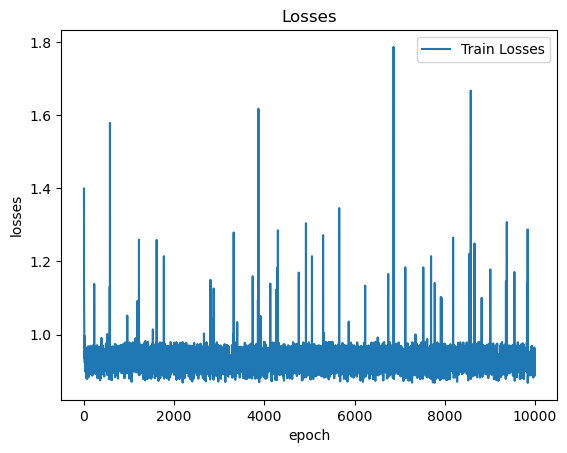

In [64]:
# Plotting the loss graph the graph of the best model
print("*" * 10)
print("Best Model:")
print(f"Regularization: {best_reg_name}")
print(f"Method: {best_method}")
print(f"Final Training Loss: {best_train_loss}")
print("*" * 10)
best_model.plot()
plt.show()

In [65]:
from sklearn.metrics import classification_report as sklearn_classification_report

# best parameters test
yhat = best_model.predict(X_test)

custom_classification_report = best_model.classification_report(y_test, yhat)
print("*" * 5, "Custom Classification report", "*" * 5)
print(custom_classification_report)

sklearn_report = sklearn_classification_report(y_test, yhat)
print("\n")
print("*" * 5, "Sklearn's Classification report", "*" * 5)
print(sklearn_report)

***** Custom Classification report *****
         precision    recall  f1-score
0         0.610149  0.937262  0.739130
1         0.650794  0.089325  0.157088
2         0.438889  0.148218  0.221599
3         0.514113  0.971429  0.672380
accuracy                      0.549682
macro     0.553486  0.536558  0.447549
weighted  0.549921  0.549682  0.456191


***** Sklearn's Classification report *****
              precision    recall  f1-score   support

           0       0.61      0.94      0.74       526
           1       0.65      0.09      0.16       459
           2       0.44      0.15      0.22       533
           3       0.51      0.97      0.67       525

    accuracy                           0.55      2043
   macro avg       0.55      0.54      0.45      2043
weighted avg       0.55      0.55      0.46      2043



In [66]:
import pickle

filename = 'st125051-car-prediction-a3.pkl'
# filename = 'st125051-car-prediction-a2.model'

pickle.dump(model, open(filename, 'wb'))

In [67]:
sample = df[ ['engine', 'mileage' , 'year']].loc[13]

In [68]:
sample

engine     1061.0
mileage      18.9
year       2009.0
Name: 13, dtype: float64

In [69]:
# sample_np = np.array([[1061.0, 18.9, 2009.0 ]]) 
sample_np = np.array([[1248.0, 23.40, 2014.0 ]]) 

sample_np

array([[1248. ,   23.4, 2014. ]])

In [70]:
loaded_model = pickle.load(open(filename, 'rb'))

In [71]:
# answer = loaded_model.predict(sample_np)
# answer = np.exp(answer)
# answer
result = loaded_model.predict(sample_np)
print(result[0]) 



3


# Report

In this project, I worked on predicting car prices by turning the selling price into a 4-class classification problem. I used **Logistic Regression** and added an option to use **Ridge regularization** to improve the model. To evaluate the model's performance, I created functions to calculate precision, recall, F1-score, and accuracy for each class, as well as the macro and weighted averages. I also compared my custom classification report with the one from **Sklearn** to make sure my results were accurate.

I used **MLflow** to track and log the model's performance metrics throughout the experiments. After comparing different models, I selected the best one and used it to make predictions on the test data.

### Model Performance:

- **Accuracy**: 0.55

#### Performance for Each Class (Custom Classification Report):

- **Class 0**:
  - Precision: 0.61
  - Recall: 0.94
  - F1-Score: 0.74
- **Class 1**:
  - Precision: 0.65
  - Recall: 0.09
  - F1-Score: 0.16
- **Class 2**:
  - Precision: 0.44
  - Recall: 0.15
  - F1-Score: 0.22
- **Class 3**:
  - Precision: 0.51
  - Recall: 0.97
  - F1-Score: 0.67

The **macro average** scores for precision, recall, and F1-score were around 0.55, 0.54, and 0.45, while the **weighted averages** were close to these, with precision and recall at 0.55, and the F1-score at 0.46.


## Feature Evaluation

While evaluating features in my dataset, I identified `engine`, `mileage`, and `year` as the most important predictors. These features directly correlate with the vehicle's price. While, features like `brand`, `selling_price`, `km_driven`, `fuel`, `seller_type`, `transmission`, `owner`, `max_power`, and `seats` are not important. The data associated with these features have class imbalance, as I have checked them with graphical distribution. This imbalance skews the prediction modeling, hence these features are less reliable for training and prediction. So I focus on the balanced features.

From the three predictors the `year` has the most weight 

### Key Takeaways:

  ### Best Model:
- **Regularization**: Ridge
- **Method**: Mini-batch Gradient Descent
- **Final Training Loss**: 0.9015

- The model performed best for **Class 0** (F1-score: 0.74) and **Class 3** (F1-score: 0.67), meaning it was able to predict these categories well.
- **Class 1** and **Class 2** were more difficult to predict, with lower recall and F1-scores, possibly due to imbalanced data or fewer clear features separating these classes.
- The overall accuracy was 0.55, and the F1-scores show that the model could be improved, especially for the weaker classes.

By using **Ridge regularization** and my custom classification functions, I was able to monitor how well the model performed and find areas where it could be better.